# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTENC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Understanding the data

In [2]:
data = pd.read_csv("PCOS_data.csv")
df = data.copy()
print(df.shape)
df.head()

(541, 45)


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

# EDA

In [4]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


## Distribution of Dataset

In [5]:
# Separate categorical and numerical columns
categorical_cols = ['Blood Group', 'Cycle(R/I)', 'Pregnant(Y/N)', 'Weight gain(Y/N)',
                    'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
                    'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Unnamed: 44', 'PCOS (Y/N)']
numerical_cols = [col for col in df.columns if col not in categorical_cols]

print(categorical_cols)
print(numerical_cols)


['Blood Group', 'Cycle(R/I)', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Unnamed: 44', 'PCOS (Y/N)']
['Sl. No', 'Patient File No.', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'No. of abortions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']


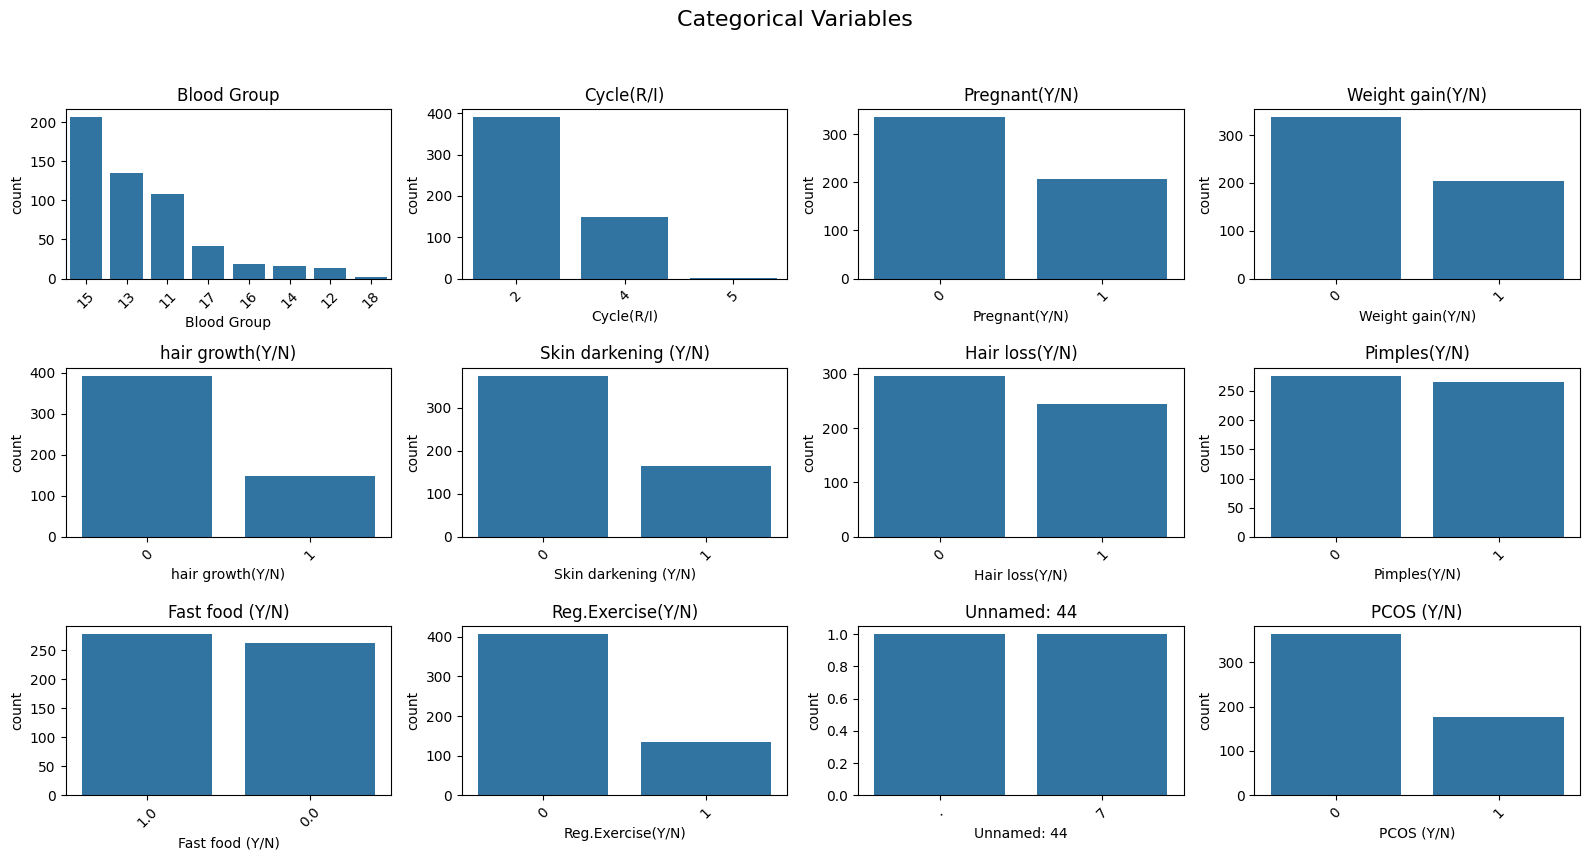

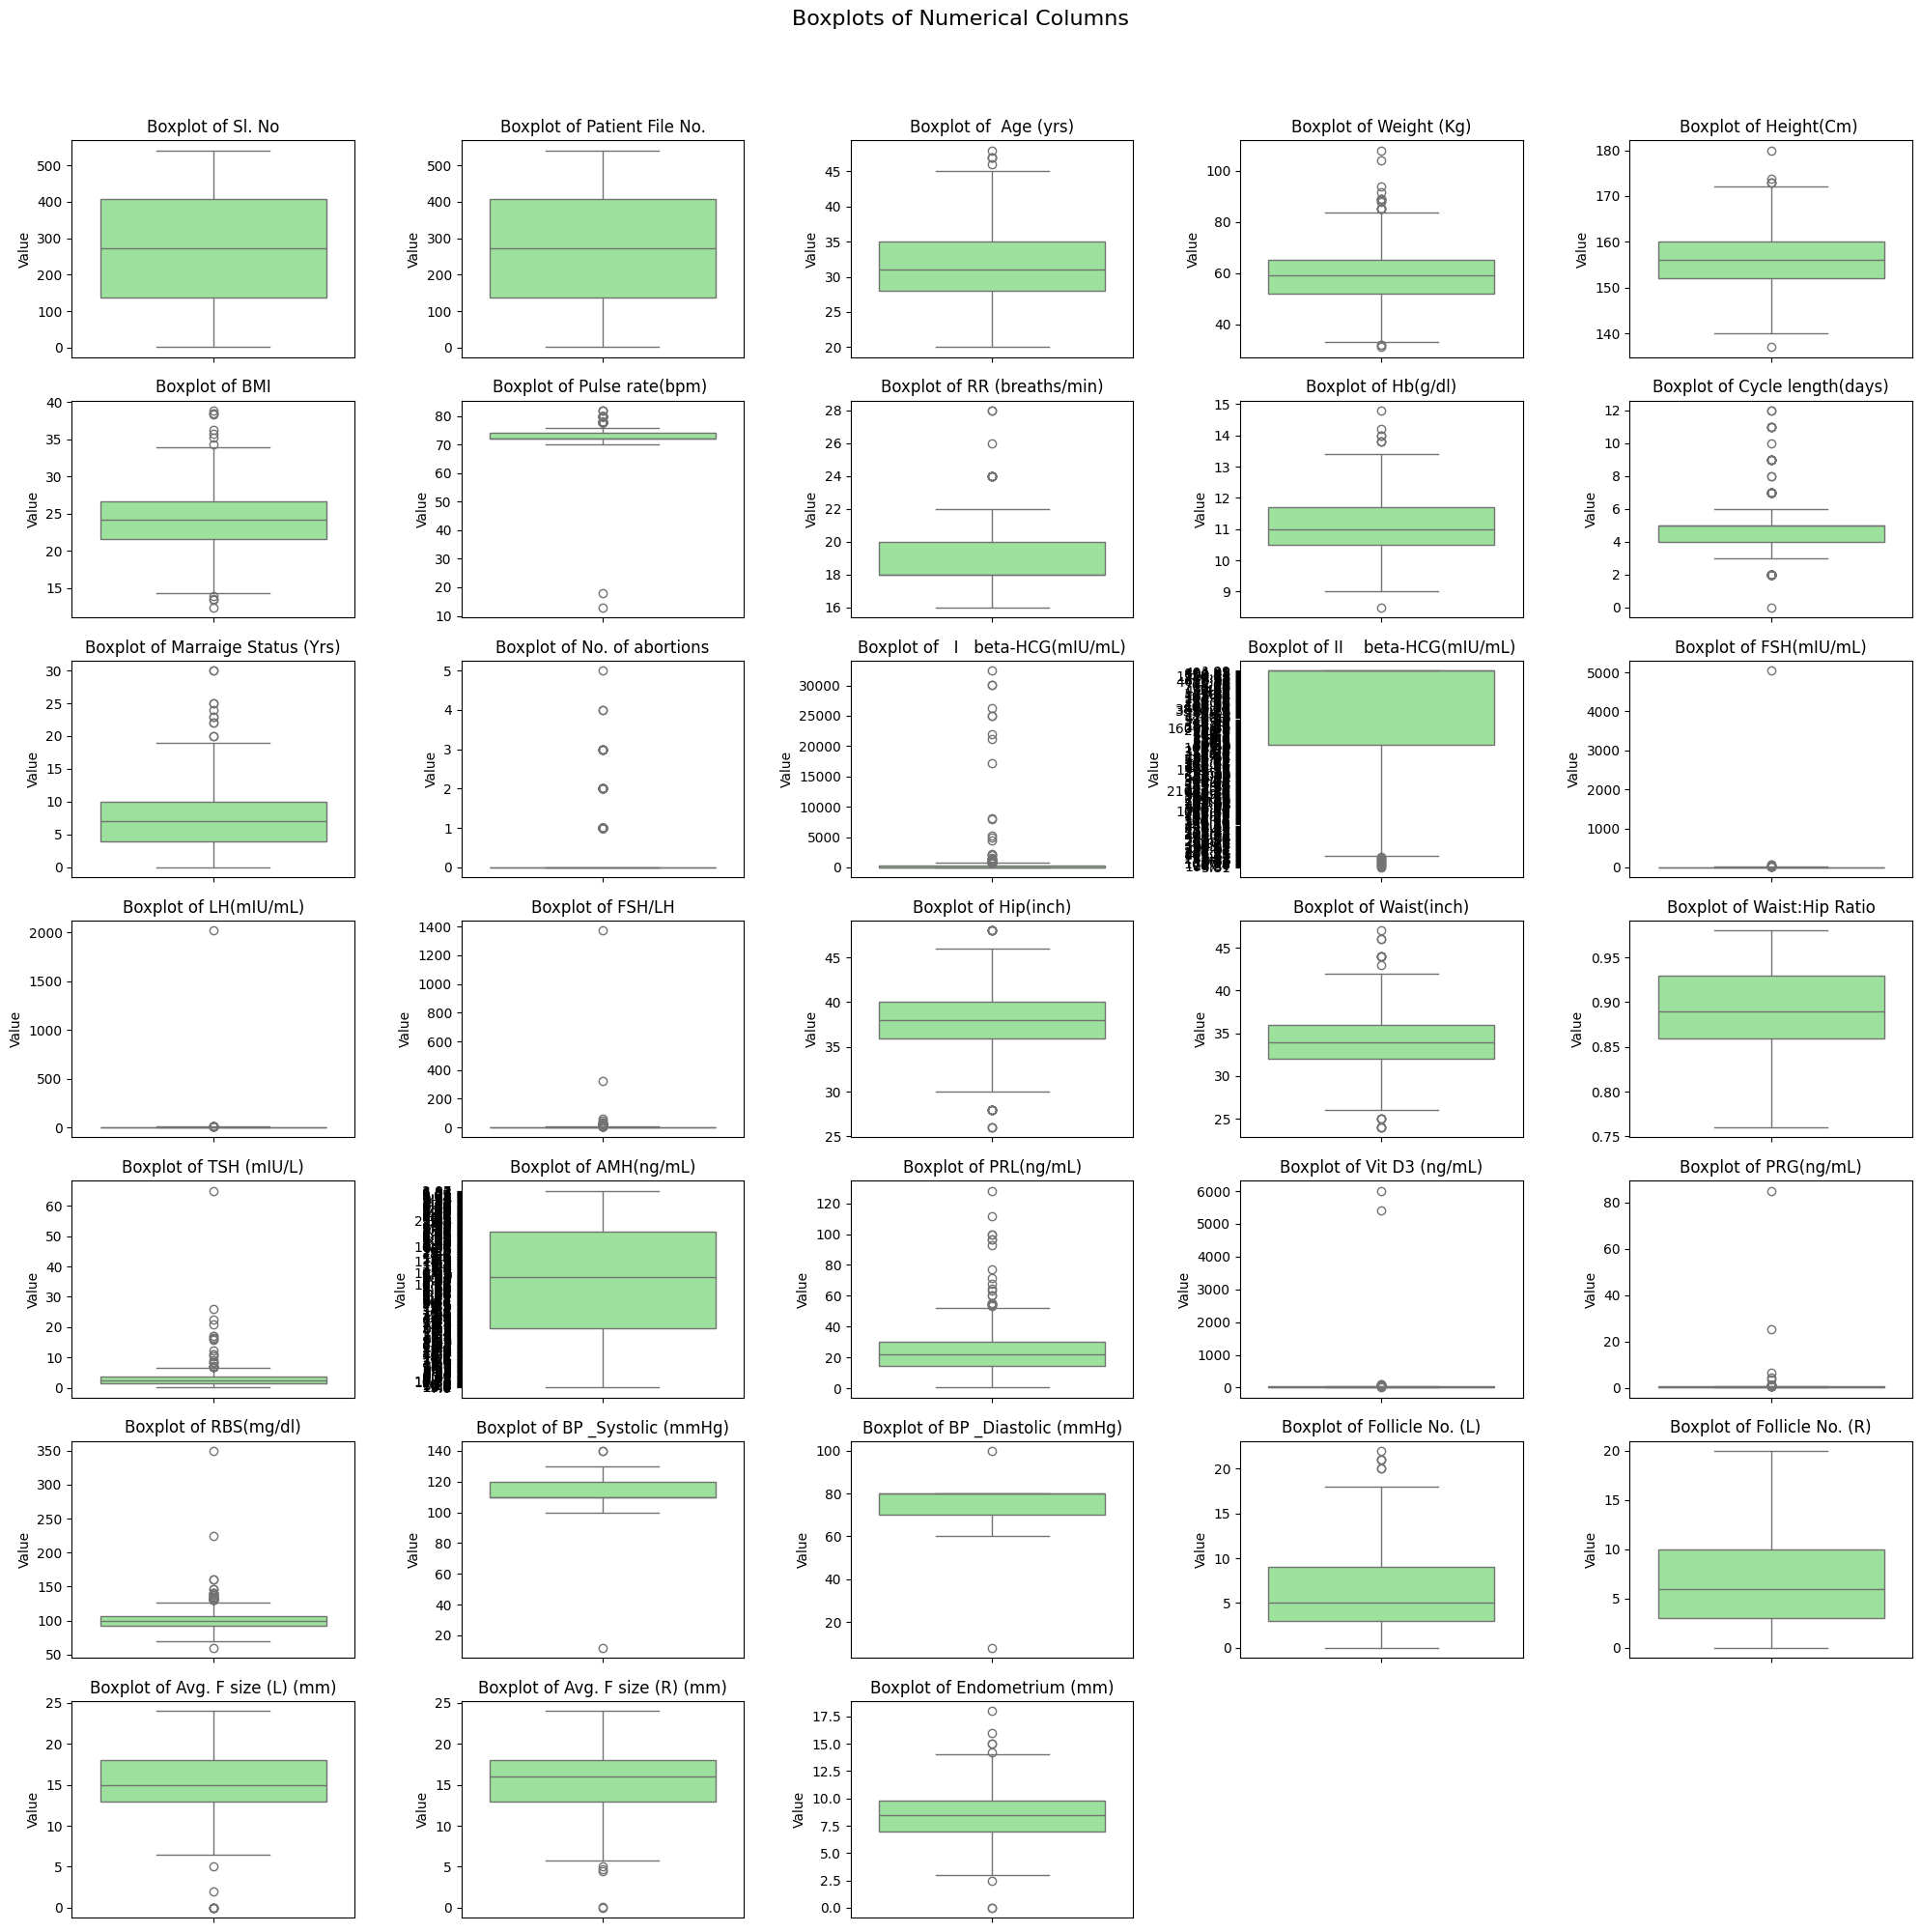

In [6]:
# Function to plot subplots for categorical columns
def plot_categorical_subplots(df, cat_cols, rows=3, cols=4):
    total = len(cat_cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
        axes[i].set_title(col)
        axes[i].tick_params(axis='x', labelrotation=45)

    # Hide unused axes
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Categorical Variables", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Function to plot subplots for numerical columns (boxplot)
def plot_numerical_boxplots(df, num_cols, rows=7, cols=5):
    total = len(num_cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.boxplot(y=df[col], ax=axes[i], color='lightgreen')
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Value")

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Boxplots of Numerical Columns", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Call the functions
plot_categorical_subplots(df, categorical_cols, rows=3, cols=4)
plot_numerical_boxplots(df, numerical_cols, rows=7, cols=5)

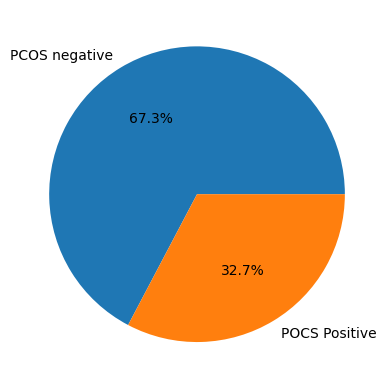

In [7]:
# PCOS (Y/N) Distribution
s = df["PCOS (Y/N)"].map({1: "POCS Positive", 0: "PCOS negative"}).value_counts()
plt.pie(s, labels=s.index, autopct='%1.1f%%')
plt.show()

# Handling NA values

In [8]:
# Unnamed column contains all NA values, which is not useful
df.drop(columns = ['Unnamed: 44'],axis=1,inplace=True)

In [9]:
df.isna().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [10]:
# Removes rows that contain NA values
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.isna().sum().sum())

0


# Handling duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

# Handling columns with wrong types

In [12]:
# find which columns do not contain numeric values (should be all numeric)
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols.tolist())

Non-numeric columns: ['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']


In [13]:
non_numeric_values = df[pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce').isna() & df['II    beta-HCG(mIU/mL)'].notna()]['II    beta-HCG(mIU/mL)']

print("Non-numeric values in column:", non_numeric_values.tolist())

Non-numeric values in column: ['1.99.']


In [14]:
non_numeric_values = df[pd.to_numeric(df['AMH(ng/mL)'], errors='coerce').isna() & df['AMH(ng/mL)'].notna()]['AMH(ng/mL)']

print("Non-numeric values in column:", non_numeric_values.tolist())

Non-numeric values in column: ['a']


In [15]:
# change the values to numeric
#1.99. high likely is a typo (extra .), so we remove the '.'
df.loc[df['II    beta-HCG(mIU/mL)'] == '1.99.', 'II    beta-HCG(mIU/mL)'] = 1.99

# 'a' does not make sense here, so we change it to NaN
df.loc[df['AMH(ng/mL)'] == 'a', 'AMH(ng/mL)'] = np.nan

In [16]:
non_numeric_cols = df.select_dtypes(exclude=['number'])

# Check for non-numeric values
for col in non_numeric_cols.columns:
    non_numeric_rows = non_numeric_cols[non_numeric_cols[col].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()]
    if not non_numeric_rows.empty:
        print(f"Column '{col}' contains non-numeric values:\n{non_numeric_rows}\n")

Column 'AMH(ng/mL)' contains non-numeric values:
    II    beta-HCG(mIU/mL) AMH(ng/mL)
304                   1.99        NaN



In [17]:
df = df.apply(pd.to_numeric, errors='coerce')
print(df.select_dtypes(exclude=[np.number]).columns)

Index([], dtype='object')


# Handling inconsistencies

In [18]:
df["Cycle(R/I)"].value_counts()

Cycle(R/I)
2    390
4    148
5      1
Name: count, dtype: int64

In [19]:
# Removes '5' from the "Menstrual Cycle (R/I)" column
df = df[df["Cycle(R/I)"]!=5]

# Removing non-useful and highly correlated columns

In [20]:
#S1. No and Patient File No. are both just numbering the patients, hence will not provide any useful information

df.drop(columns = ['Sl. No','Patient File No.'],axis=1,inplace=True)

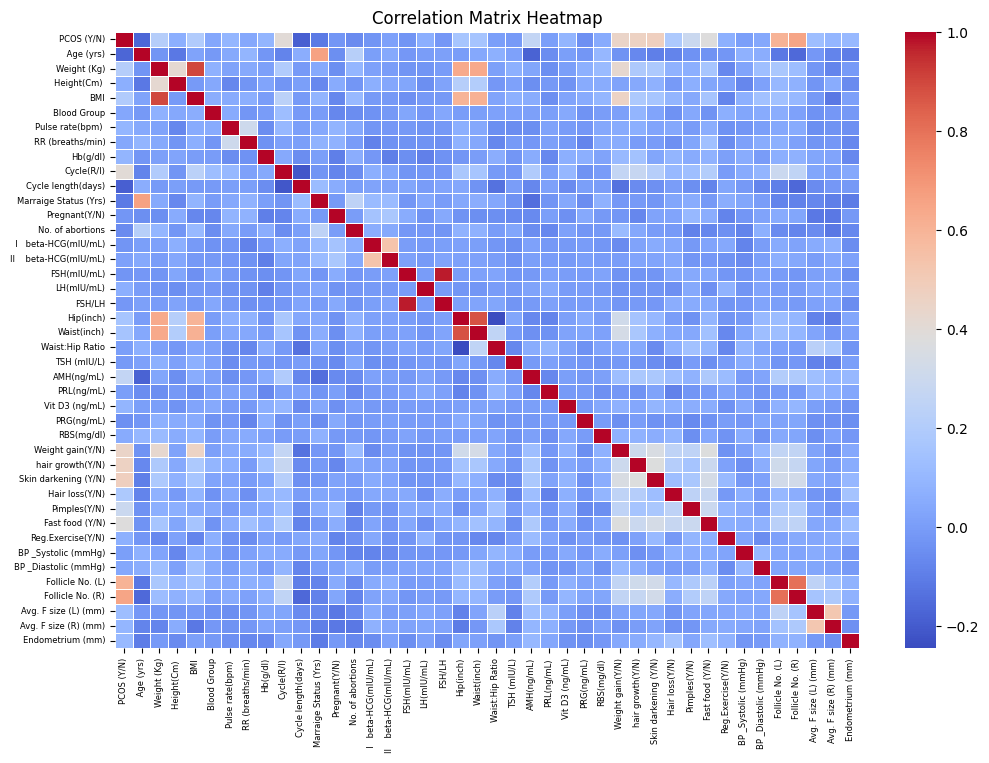

In [21]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adjust axis label font size
plt.xticks(fontsize=6, rotation=90)  # X-axis label size
plt.yticks(fontsize=6)  # Y-axis label size
plt.title("Correlation Matrix Heatmap")
plt.show()

In [22]:
#BMI is derived from height and weight, hence will be highly correlated
#Waist:Hip Ratio is derived from hip and waist, hence will be highly correlated
#FSH/LH is derived from LH(mIU/mL) and FSH(mIU/mL), hence will be highly correlated
#Marriage Status correlated with Age

#Hip and Waist correlated with BMI/weight as well
#I   beta-HCG(mIU/mL) and II   beta-HCG(mIU/mL) correlated, can check the meaning of both terms
#FSH/LH and FSH(mIU/mL) highly correlated, may be same thing
#weight gain and weight/bmi correlated
#Follicle No. (L) and (R) highly correlated
#Avg. F size (L) and (R) correlated

df.drop(columns = ['Weight (Kg)','Height(Cm) ','Hip(inch)', 'Waist(inch)', 'LH(mIU/mL)', 'FSH(mIU/mL)'],axis=1,inplace=True)

In [23]:
print(df.columns)

Index(['PCOS (Y/N)', ' Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH/LH',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')


# Renaming columns

In [24]:
# Remove space in column names using strip() function
df.rename(columns=lambda x: x.strip(), inplace=True)
print(df.columns)

Index(['PCOS (Y/N)', 'Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH/LH',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')


In [25]:
# Correct spelling errors and make the column names clearer
d={"Marraige Status (Yrs)":"Marriage Status (Yrs)", "Cycle(R/I)":"Menstrual Cycle(R/I)", 
   "Cycle length(days)": "Menstrual Cycle Length(days)"}
df.rename(columns=d, inplace=True)
print(df.columns)

Index(['PCOS (Y/N)', 'Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Menstrual Cycle(R/I)',
       'Menstrual Cycle Length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH/LH', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


# Handling outliers

In [26]:
# Pulse rate(bpm)
df[(df["Pulse rate(bpm)"]<60)|(df["Pulse rate(bpm)"]>100)]

,PCOS (Y/N),Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle(R/I),Menstrual Cycle Length(days),Marriage Status (Yrs),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
222,0,30,21.7,11,18,20,12.0,2,5,5.0,...,0,1.0,1,120,70,4,3,14.0,18.0,8.7
295,0,31,20.8,15,13,18,11.0,2,4,12.0,...,1,0.0,0,110,70,8,5,17.0,15.0,8.5


In [27]:
# FSH(mIU/mL) normal range is between 4.7 and 21.5 mIU/mL
# df[df['FSH(mIU/mL)']==5052]

In [28]:
# Value is too high
# df[df["LH(mIU/mL)"]==2018]

In [29]:
# Removed those patients who have super low pulse rates
df = df[(df["Pulse rate(bpm)"]>=60) & (df["Pulse rate(bpm)"]<=100)]

# Removed the patient with super high FSH(mIU/mL)
# df = df[df['FSH(mIU/mL)']!=5052]

# Removed the patient with super high LH(mIU/mL)
# df = df[df["LH(mIU/mL)"]!=2018]

In [30]:
# AMH(ng/mL)
df = df[df["AMH(ng/mL)"] != 66]

# Vit D3 (ng/mL)
df = df[df["Vit D3 (ng/mL)"] != 0]
df = df[df["Vit D3 (ng/mL)"] <= 1000]

In [31]:
df = df[(df["BP _Systolic (mmHg)"]>=30)]
df = df[(df["BP _Diastolic (mmHg)"]>=30)]

In [32]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

# Changing the integers in categorical columns to strings, before one-hot encoding

In [33]:
# Blood Group
d={11: "A+", 12: "A-", 13: "B+", 14: "B-", 15: "O+", 16:"O-", 17: "AB+", 18: "AB-"}
df["Blood Group"] = df["Blood Group"].replace(to_replace=d)
df["Blood Group"].value_counts()

Blood Group
O+     202
B+     130
A+     106
AB+     41
O-      19
B-      16
A-      13
AB-      2
Name: count, dtype: int64

In [34]:
# Menstrual Cycle(R/I)
d={4: "irregular", 2: "regular"}
df["Menstrual Cycle(R/I)"] = df["Menstrual Cycle(R/I)"].replace(to_replace=d)
df["Menstrual Cycle(R/I)"].value_counts()

Menstrual Cycle(R/I)
regular      383
irregular    146
Name: count, dtype: int64

In [35]:
tabtransformer_input = df.copy()
tabtransformer_input

,PCOS (Y/N),Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle(R/I),Menstrual Cycle Length(days),Marriage Status (Yrs),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,19.3,O+,78,22,10.48,regular,5,7.0,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,24.9,O+,74,20,11.70,regular,5,11.0,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,25.3,A+,72,18,11.80,regular,5,10.0,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,29.7,B+,72,20,12.00,regular,5,4.0,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,20.1,A+,72,18,10.00,regular,5,1.0,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,0,35,18.5,AB+,72,16,11.00,regular,5,8.0,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
525,0,30,25.3,O+,72,18,10.80,regular,5,4.0,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
526,0,36,23.4,B+,74,20,10.80,regular,6,8.0,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
527,0,27,22.2,O+,74,20,12.00,irregular,2,2.0,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


# Random Forest Classifier with RFE

## One-Hot Encoding of categorical columns

In [36]:
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print(cat_cols)

['Blood Group', 'Menstrual Cycle(R/I)']


In [37]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[cat_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(cat_cols))
df= pd.concat([df.drop(cat_cols, axis=1), one_hot_df], axis=1)
df.head()

,PCOS (Y/N),Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,...,Blood Group_A+,Blood Group_A-,Blood Group_AB+,Blood Group_AB-,Blood Group_B+,Blood Group_B-,Blood Group_O+,Blood Group_O-,Menstrual Cycle(R/I)_irregular,Menstrual Cycle(R/I)_regular
0,0,28,19.3,78,22,10.48,5,7.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,36,24.9,74,20,11.70,5,11.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,33,25.3,72,18,11.80,5,10.0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,37,29.7,72,20,12.00,5,4.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,25,20.1,72,18,10.00,5,1.0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
df.isna().sum().sum()

np.int64(0)

## Train Test Split

In [39]:
# dependent variable
y= df['PCOS (Y/N)']
# independent variables
X= df.drop(['PCOS (Y/N)'], axis=1) 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)

(423, 43)
(106, 43)


## Standardisation

In [41]:
category_col_names = ['Blood Group_A+', 'Blood Group_A-', 'Blood Group_AB+','Blood Group_AB-', 
'Blood Group_B+', 'Blood Group_B-', 'Blood Group_O+', 'Blood Group_O-', 
'Menstrual Cycle(R/I)_irregular', 'Menstrual Cycle(R/I)_regular', 'Weight gain(Y/N)', 
'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Pregnant(Y/N)']
numeric_col_names = X.loc[:, ~X.columns.isin(category_col_names)].columns

scaler = StandardScaler()
X_train[numeric_col_names] = scaler.fit_transform(X_train[numeric_col_names])
X_test[numeric_col_names] = scaler.transform(X_test[numeric_col_names])

## Resampling with SMOTENC

In [42]:
smotenc = SMOTENC(categorical_features=category_col_names, random_state=42)
X_train, y_train = smotenc.fit_resample(X_train, y_train)

## RFE

In [43]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rfecv = RFECV(estimator=rf, min_features_to_select=1, scoring='roc_auc', cv=5, n_jobs=-1)
X_train_selected = rfecv.fit_transform(X_train, y_train)
X_test_selected = rfecv.transform(X_test)
selected_features = X.columns[rfecv.support_]
print("selected features:", selected_features)

selected features: Index(['Age (yrs)', 'BMI', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
       'Menstrual Cycle Length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH/LH', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Blood Group_A+', 'Blood Group_A-', 'Blood Group_B+', 'Blood Group_O+',
       'Menstrual Cycle(R/I)_irregular', 'Menstrual Cycle(R/I)_regular'],
      dtype='object')


# Feature Selection

In [44]:
lst = ['Blood Group_A+', 'Blood Group_A-', 'Blood Group_B+', 'Blood Group_O+', 'Menstrual Cycle(R/I)_irregular', 'Menstrual Cycle(R/I)_regular']
columns = [col for col in selected_features if col not in lst]+['Blood Group', 'Menstrual Cycle(R/I)', 'PCOS (Y/N)']
tabtransformer_input_new = tabtransformer_input[columns]
tabtransformer_input_new

,Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),...,BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Blood Group,Menstrual Cycle(R/I),PCOS (Y/N)
0,28,19.3,78,22,10.48,5,7.0,0,0,1.99,...,110,80,3,3,18.0,18.0,8.5,O+,regular,0
1,36,24.9,74,20,11.70,5,11.0,1,0,60.80,...,120,70,3,5,15.0,14.0,3.7,O+,regular,0
2,33,25.3,72,18,11.80,5,10.0,1,0,494.08,...,120,80,13,15,18.0,20.0,10.0,A+,regular,1
3,37,29.7,72,20,12.00,5,4.0,0,0,1.99,...,120,70,2,2,15.0,14.0,7.5,B+,regular,0
4,25,20.1,72,18,10.00,5,1.0,1,0,801.45,...,120,80,3,4,16.0,14.0,7.0,A+,regular,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,35,18.5,72,16,11.00,5,8.0,0,1,1.99,...,110,70,1,0,17.5,10.0,6.7,AB+,regular,0
525,30,25.3,72,18,10.80,5,4.0,1,1,80.13,...,110,70,9,7,19.0,18.0,8.2,O+,regular,0
526,36,23.4,74,20,10.80,6,8.0,0,0,1.99,...,110,80,1,0,18.0,9.0,7.3,B+,regular,0
527,27,22.2,74,20,12.00,2,2.0,0,0,292.92,...,110,70,7,6,18.0,16.0,11.5,O+,irregular,0


# Train Test Split

In [45]:
# dependent variable
y= tabtransformer_input_new['PCOS (Y/N)']
# independent variables
X= tabtransformer_input_new.drop(['PCOS (Y/N)'], axis=1) 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)

(423, 35)
(106, 35)


# For TabTransformers 

## Standardisation

In [47]:
X_train_tt = X_train.copy()
X_test_tt = X_test.copy()

In [48]:
category_col_names = ['Blood Group', 'Menstrual Cycle(R/I)', 'Weight gain(Y/N)', 
'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Pregnant(Y/N)']
numeric_col_names = X.loc[:, ~X.columns.isin(category_col_names)].columns

scaler = StandardScaler()
X_train_tt[numeric_col_names] = scaler.fit_transform(X_train_tt[numeric_col_names])
X_test_tt[numeric_col_names] = scaler.transform(X_test_tt[numeric_col_names])

## Saving the csv files for TabTransformers code

In [49]:
X_train_tt.to_csv("./tt_data/X_train_tt.csv", header=True, index=False)
X_test_tt.to_csv("./tt_data/X_test_tt.csv", header=True, index=False)

## Reading the csv files for the TabTransformers code to check

In [50]:
data = pd.read_csv("./tt_data/X_test_tt.csv")
data

,Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Blood Group,Menstrual Cycle(R/I)
0,1.212838,2.332019,1.784158,1.754218,0.288113,0.007810,2.534856,0,-0.413545,-0.194309,...,0,0.892958,0.619366,-1.221873,-0.805273,-0.262478,1.362066,-2.108363,B+,regular
1,-0.777055,-0.323970,-1.286845,-0.729579,-0.432169,0.007810,-0.542473,1,-0.413545,7.729524,...,0,-0.800859,-1.510650,0.467976,-0.358251,0.808188,-0.134725,0.188945,O+,regular
2,-0.596155,0.382669,-0.519094,0.512320,-0.792311,0.668536,-0.542473,0,-0.413545,-0.194306,...,0,0.892958,0.619366,-0.256245,-0.358251,-0.262478,0.164633,-0.261507,A+,regular
3,-0.777055,-0.104668,-0.519094,0.512320,-0.912358,0.007810,-0.132163,1,-0.413545,0.056235,...,0,-0.800859,0.619366,-0.256245,0.312281,0.808188,0.763349,0.188945,A+,regular
4,1.936436,-1.225544,0.248657,-1.971477,-1.392546,-1.313642,-0.542473,1,-0.413545,-0.189680,...,0,0.892958,0.619366,-1.221873,-1.252294,-0.262478,-0.733442,0.279036,O+,irregular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.127442,0.041533,-0.519094,-0.729579,-0.072028,-0.652916,1.098769,0,-0.413545,-0.027675,...,1,0.892958,0.619366,-0.256245,-0.358251,0.540522,1.062708,0.188945,O+,irregular
102,0.670140,-1.249911,-0.519094,0.512320,-0.432169,0.007810,0.483303,1,1.032154,0.039605,...,0,0.892958,0.619366,-0.739059,-0.805273,0.272855,-0.134725,0.188945,O+,regular
103,0.670140,0.601971,1.784158,1.754218,-3.193251,0.007810,0.893614,1,1.032154,-0.116208,...,0,-0.800859,0.619366,1.916417,1.206324,-1.868477,-3.128308,-1.387639,O-,regular
104,0.127442,-0.957508,-0.135219,4.238015,0.888348,0.668536,0.483303,0,-0.413545,-0.194309,...,0,-0.800859,-3.640666,-0.256245,-0.358251,-0.262478,-0.733442,-0.937186,A+,regular


In [51]:
data = pd.read_csv("./tt_data/X_train_tt.csv")
data

,Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Blood Group,Menstrual Cycle(R/I)
0,1.212838,1.138042,1.784158,0.512320,2.088819,-1.974369,1.714235,1,1.032154,-0.155302,...,0,-0.800859,-1.510650,1.433603,1.206324,0.540522,-1.930875,1.224986,A+,irregular
1,1.212838,-0.738207,-0.519094,-0.729579,1.608630,0.007810,1.303924,0,-0.413545,-0.194309,...,0,-0.800859,-1.510650,-0.497652,-1.252294,0.540522,-0.733442,-0.937186,B+,regular
2,0.670140,-0.713840,-0.519094,0.512320,1.008395,0.668536,1.098769,1,-0.413545,0.542465,...,0,4.280591,-1.510650,-0.739059,-0.358251,-1.333144,-1.332158,-1.612865,A+,regular
3,-0.415256,-1.152443,2.551909,0.512320,-0.072028,0.007810,-1.157939,1,-0.413545,2.727182,...,0,-0.800859,-1.510650,-0.014838,-0.358251,1.343521,1.362066,-1.342594,B+,regular
4,1.031939,1.138042,2.551909,1.754218,0.048019,0.007810,1.303924,0,-0.413545,-0.194309,...,1,0.892958,0.619366,-0.739059,-0.805273,1.611188,0.763349,0.324081,O+,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,-0.415256,1.211143,-0.519094,-0.729579,1.008395,0.007810,0.278148,0,-0.413545,-0.194309,...,1,-0.800859,-1.510650,-1.221873,-1.252294,-0.797811,-0.434084,0.414172,O+,irregular
419,-0.777055,-0.299603,3.319660,0.512320,-0.072028,0.007810,-0.542473,0,-0.413545,-0.194309,...,1,0.892958,0.619366,-1.221873,-1.252294,0.272855,0.463991,-0.013759,A+,regular
420,0.670140,-0.445804,0.248657,0.512320,-0.072028,-0.652916,1.509080,1,1.032154,-0.194309,...,0,-0.800859,-1.510650,-0.739059,-0.805273,0.808188,0.763349,-0.711960,B+,regular
421,0.851040,0.236468,-0.519094,-0.729579,0.768301,-1.974369,0.483303,0,-0.413545,-0.194309,...,0,0.892958,-1.510650,0.467976,-0.134740,-0.530144,-0.134725,-0.036281,A+,irregular


# For other models

## One-Hot Encoding of categorical columns

In [52]:
cat_cols = tabtransformer_input.select_dtypes(exclude=np.number).columns.tolist()
print(cat_cols)

['Blood Group', 'Menstrual Cycle(R/I)']


In [53]:
# For X_train
X_train = X_train.reset_index(drop=True)
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(X_train[cat_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(cat_cols))
X_train = pd.concat([X_train.drop(cat_cols, axis=1), one_hot_df], axis=1)
X_train

,Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),...,Blood Group_A+,Blood Group_A-,Blood Group_AB+,Blood Group_AB-,Blood Group_B+,Blood Group_B-,Blood Group_O+,Blood Group_O-,Menstrual Cycle(R/I)_irregular,Menstrual Cycle(R/I)_regular
0,38,29.0,78,20,12.9,2,16.0,1,1,110.17,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,38,21.3,72,18,12.5,5,14.0,0,0,1.99,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,35,21.4,72,20,12.0,6,13.0,1,0,2045.30,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,29,19.6,80,20,11.1,5,2.0,1,0,8104.21,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,37,29.0,80,22,11.2,5,14.0,0,0,1.99,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,29,29.3,72,18,12.0,5,9.0,0,0,1.99,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
419,27,23.1,82,20,11.1,5,5.0,0,0,1.99,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
420,35,22.5,74,20,11.1,4,15.0,1,1,1.99,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
421,36,25.3,72,18,11.8,2,10.0,0,0,1.99,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
# For X_test
X_test = X_test.reset_index(drop=True)
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(X_test[cat_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(cat_cols))
X_test = pd.concat([X_test.drop(cat_cols, axis=1), one_hot_df], axis=1)
X_test

,Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),...,Endometrium (mm),Blood Group_A+,Blood Group_A-,Blood Group_AB+,Blood Group_B+,Blood Group_B-,Blood Group_O+,Blood Group_O-,Menstrual Cycle(R/I)_irregular,Menstrual Cycle(R/I)_regular
0,38,33.9,78,22,11.4,5,20.0,0,0,1.99,...,3.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,27,23.0,70,18,10.8,5,5.0,1,0,21977.29,...,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,28,25.9,72,20,10.5,6,5.0,0,0,2.00,...,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,27,23.9,72,20,10.4,5,7.0,1,0,696.83,...,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,42,19.3,74,16,10.0,3,5.0,1,0,14.83,...,9.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,32,24.5,72,18,11.1,4,13.0,0,0,464.12,...,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
102,35,19.2,72,20,10.8,5,10.0,1,1,650.71,...,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
103,35,26.8,78,22,8.5,5,12.0,1,1,218.59,...,5.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
104,32,20.4,73,26,11.9,6,10.0,0,0,1.99,...,6.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Feature Selection

In [55]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]
print(X_train.shape)
print(X_test.shape)

(423, 39)
(106, 39)


In [56]:
X_train.columns

Index(['Age (yrs)', 'BMI', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
       'Menstrual Cycle Length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH/LH', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Blood Group_A+', 'Blood Group_A-', 'Blood Group_B+', 'Blood Group_O+',
       'Menstrual Cycle(R/I)_irregular', 'Menstrual Cycle(R/I)_regular'],
      dtype='object')

## Standardisation

In [57]:
category_col_names = ['Blood Group_A+', 'Blood Group_A-', 'Blood Group_B+', 'Blood Group_O+', 
'Menstrual Cycle(R/I)_irregular', 'Menstrual Cycle(R/I)_regular', 'Weight gain(Y/N)', 
'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Pregnant(Y/N)']
numeric_col_names = X_train.loc[:, ~X_train.columns.isin(category_col_names)].columns

scaler = StandardScaler()
X_train[numeric_col_names] = scaler.fit_transform(X_train[numeric_col_names])
X_test[numeric_col_names] = scaler.transform(X_test[numeric_col_names])

C:\Users\shuya\AppData\Local\Temp\ipykernel_72900\1542446885.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_col_names] = scaler.fit_transform(X_train[numeric_col_names])
C:\Users\shuya\AppData\Local\Temp\ipykernel_72900\1542446885.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numeric_col_names] = scaler.transform(X_test[numeric_col_names])


## Resampling with SMOTENC

In [58]:
smotenc = SMOTENC(categorical_features=category_col_names, random_state=42)
X_train, y_train = smotenc.fit_resample(X_train, y_train)

## Saving the csv files

In [59]:
X_train.to_csv("X_train.csv", header=True, index=False)
X_test.to_csv("X_test.csv", header=True, index=False)
y_train.to_csv("y_train.csv", header=True, index=False)
y_test.to_csv("y_test.csv", header=True, index=False)

## Reading in the csv files

In [60]:
data = pd.read_csv("X_train.csv")
data

,Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),...,Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Blood Group_A+,Blood Group_A-,Blood Group_B+,Blood Group_O+,Menstrual Cycle(R/I)_irregular,Menstrual Cycle(R/I)_regular
0,1.212838,1.138042,1.784158,0.512320,2.088819,-1.974369,1.714235,1,1.032154,-0.155302,...,1.206324,0.540522,-1.930875,1.224986,1.0,0.0,0.0,0.0,1.0,0.0
1,1.212838,-0.738207,-0.519094,-0.729579,1.608630,0.007810,1.303924,0,-0.413545,-0.194309,...,-1.252294,0.540522,-0.733442,-0.937186,0.0,0.0,1.0,0.0,0.0,1.0
2,0.670140,-0.713840,-0.519094,0.512320,1.008395,0.668536,1.098769,1,-0.413545,0.542465,...,-0.358251,-1.333144,-1.332158,-1.612865,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.415256,-1.152443,2.551909,0.512320,-0.072028,0.007810,-1.157939,1,-0.413545,2.727182,...,-0.358251,1.343521,1.362066,-1.342594,0.0,0.0,1.0,0.0,0.0,1.0
4,1.031939,1.138042,2.551909,1.754218,0.048019,0.007810,1.303924,0,-0.413545,-0.194309,...,-0.805273,1.611188,0.763349,0.324081,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,-1.500652,0.391513,0.471164,-0.729579,-0.295301,0.007810,-1.069735,1,-0.413545,-0.194309,...,1.655484,-0.262478,-0.263431,0.954284,1.0,0.0,0.0,0.0,0.0,1.0
568,-1.663973,0.035117,0.211353,0.391636,1.690291,-1.845955,-0.932848,0,-0.413545,-0.194309,...,1.494994,0.057211,0.135542,0.665662,0.0,0.0,0.0,0.0,1.0,0.0
569,-0.777055,-0.014873,2.375315,1.276096,-0.293518,0.007810,-0.794817,0,-0.413545,-0.194307,...,0.122313,0.602089,1.016314,-0.443158,0.0,0.0,0.0,0.0,1.0,0.0
570,1.393738,0.017166,1.784158,0.512320,-0.552216,-0.633201,1.098769,0,-0.413545,-0.190567,...,0.982813,0.545846,-0.419196,2.860747,0.0,0.0,0.0,1.0,1.0,0.0


In [61]:
y_train

0      1
1      0
2      0
3      0
4      0
      ..
567    1
568    1
569    1
570    1
571    1
Name: PCOS (Y/N), Length: 572, dtype: int64

# Feature Engineering (Converting columns into categorical variables)

In [62]:
cat_df = tabtransformer_input.copy()
cat_df.head() 

,PCOS (Y/N),Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle(R/I),Menstrual Cycle Length(days),Marriage Status (Yrs),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,19.3,O+,78,22,10.48,regular,5,7.0,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,24.9,O+,74,20,11.70,regular,5,11.0,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,25.3,A+,72,18,11.80,regular,5,10.0,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,29.7,B+,72,20,12.00,regular,5,4.0,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,20.1,A+,72,18,10.00,regular,5,1.0,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [63]:
# Possible derived variables
cat_df['Symptoms score'] = cat_df[['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)']].sum(axis=1)

temp_df = cat_df.copy()
temp_df['Reg.Exercise(Y/N)'] = temp_df['Reg.Exercise(Y/N)'].map({1: 0, 0: 1})
cat_df['Unhealthy living score'] = temp_df[['Reg.Exercise(Y/N)','Fast food (Y/N)']].sum(axis=1)

In [64]:
# Hb(g/dl)
cat_df["Hb(g/dl)"] = cat_df.apply(lambda row: ("low" if row["Hb(g/dl)"] < 12 else "normal" if row["Hb(g/dl)"] <= 16 else "high") if row["Pregnant(Y/N)"] == 0 else ("low" if row["Hb(g/dl)"] < 11 else "normal" if row["Hb(g/dl)"] <= 14 else "high"), axis=1)

# TSH (mIU/L)
cat_df["TSH (mIU/L)"] = cat_df["TSH (mIU/L)"].apply(lambda x: "low" if x < 0.4 else "normal" if x <= 4 else "high")

# AMH(ng/mL)
cat_df["AMH(ng/mL)"] = cat_df["AMH(ng/mL)"].apply(lambda x: "low" if x < 1 else "normal" if x <= 3 else "high")

# PRL(ng/mL)
cat_df["PRL(ng/mL)"] = cat_df.apply(lambda row: ("normal" if row["PRL(ng/mL)"] < 25 else "high") if row["Pregnant(Y/N)"] == 0 else ("low" if row["PRL(ng/mL)"] < 80 else "normal" if row["PRL(ng/mL)"] <= 400 else "high"), axis=1)

# Vit D3 (ng/mL)
cat_df["Vit D3 (ng/mL)"] = cat_df["Vit D3 (ng/mL)"].apply(lambda x: "low" if x < 20 else "normal" if x <= 50 else "high")

In [65]:
# RR (breaths/min)
cat_df["RR (breaths/min)"] = cat_df["RR (breaths/min)"].apply(lambda x: "low" if x < 12 else "normal" if x <= 20 else "high")

# I   beta-HCG(mIU/mL)
cat_df["I beta-HCG cat"] = cat_df.apply(lambda row: ("normal" if row["I   beta-HCG(mIU/mL)"]<5 else "abnormal") if row["Pregnant(Y/N)"]==0 else ("abnormal" if row["I   beta-HCG(mIU/mL)"]<5 else "normal"), axis=1)

# II    beta-HCG(mIU/mL)
cat_df["II beta-HCG cat"] = cat_df.apply(lambda row: ("normal" if row["II    beta-HCG(mIU/mL)"]<5 else "abnormal") if row["Pregnant(Y/N)"]==0 else ("abnormal" if row["II    beta-HCG(mIU/mL)"]<5 else "normal"), axis=1)

# FSH(mIU/mL)
# Assuming that all the females have puberty already and have yet to reach menopause, based on their ages.
# Their normal levels should be 4.7 to 21.5 mIU/mL.
# cat_df["FSH(mIU/mL)"] = cat_df["FSH(mIU/mL)"].apply(lambda x: "low" if x < 4.7 else "normal" if x <= 21.5 else "high")


In [66]:
# 'PRG(ng/mL)' progesterone
cat_df["PRG(ng/mL)"] = cat_df.apply(lambda row: (
    # Non-pregnant: use luteal-phase range as the benchmark
    "low" if row["PRG(ng/mL)"] < 2 else "normal" if row["PRG(ng/mL)"] <= 25 else "high"
) if row["Pregnant(Y/N)"] == 0 else (
    "low" if row["PRG(ng/mL)"] < 10 
    else "normal" if row["PRG(ng/mL)"] <= 290
    # Pregnant: approximate categorization by trimester???
    # else "first_trimester" if row["PRG(ng/mL)"] <= 44 
    # else "second_trimester" if row["PRG(ng/mL)"] <= 82.5 
    # else "third_trimester" if row["PRG(ng/mL)"] <= 290 
    else "high"
), axis=1)

# 'RBS(mg/dl)'
cat_df["RBS(mg/dl)"] = cat_df["RBS(mg/dl)"].apply(lambda x: "low" if x < 70 else "normal" if x < 140 else "high")
# pre-diabetes: 140-199
# diabetes >200

# 'BP _Systolic (mmHg)'
cat_df["BP _Systolic (mmHg)"] = cat_df["BP _Systolic (mmHg)"].apply(lambda x: "low" if x < 90 else "normal" if x <= 139 else "high")

# 'BP _Diastolic (mmHg)’
cat_df["BP _Diastolic (mmHg)"] = cat_df["BP _Diastolic (mmHg)"].apply(lambda x: "low" if x < 60 else "normal" if x <= 89 else "high")

# 'Endometrium (mm)'
# This one really depends on the phase of the menstrual cycle?
# cat_df["Endometrium (mm)"] = cat_df["Endometrium (mm)"].apply(lambda x: "thin" if x < 5 else "normal" if x <= 16 else "thick")


# Random Forest Classifier with RFE

## One-Hot Encoding of categorical columns

In [67]:
# One-Hot Encoding of categorical columns
cat_cols = list(cat_df.select_dtypes(exclude=np.number).columns)
cat_cols

['Blood Group',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Menstrual Cycle(R/I)',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'I beta-HCG cat',
 'II beta-HCG cat']

In [68]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(cat_df[cat_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(cat_cols))
df = pd.concat([cat_df.drop(cat_cols, axis=1), one_hot_df], axis=1)
df.head() 

,PCOS (Y/N),Age (yrs),BMI,Pulse rate(bpm),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),...,RBS(mg/dl)_low,RBS(mg/dl)_normal,BP _Systolic (mmHg)_high,BP _Systolic (mmHg)_normal,BP _Diastolic (mmHg)_high,BP _Diastolic (mmHg)_normal,I beta-HCG cat_abnormal,I beta-HCG cat_normal,II beta-HCG cat_abnormal,II beta-HCG cat_normal
0,0,28,19.3,78,5,7.0,0,0,1.99,1.99,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0,36,24.9,74,5,11.0,1,0,60.80,1.99,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1,33,25.3,72,5,10.0,1,0,494.08,494.08,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0,37,29.7,72,5,4.0,0,0,1.99,1.99,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0,25,20.1,72,5,1.0,1,0,801.45,801.45,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [69]:
df.isna().sum().sum()

np.int64(0)

## Train Test Split

In [70]:
# dependent variable
y= df['PCOS (Y/N)']
# independent variables
X= df.drop(['PCOS (Y/N)'], axis=1) 

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)

(423, 65)
(106, 65)


## Standardisation

In [72]:
category_col_names = ['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 
'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Pregnant(Y/N)']+list(encoder.get_feature_names_out(cat_cols))
numeric_col_names = X.loc[:, ~X.columns.isin(category_col_names)].columns

scaler = StandardScaler()
X_train[numeric_col_names] = scaler.fit_transform(X_train[numeric_col_names])
X_test[numeric_col_names] = scaler.transform(X_test[numeric_col_names])

## Resampling with SMOTENC

In [73]:
smotenc = SMOTENC(categorical_features=category_col_names, random_state=42)
X_train, y_train = smotenc.fit_resample(X_train, y_train)

## RFE

In [74]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rfecv = RFECV(estimator=rf, min_features_to_select=1, scoring='roc_auc', cv=5, n_jobs=-1)
X_train_selected = rfecv.fit_transform(X_train, y_train)
X_test_selected = rfecv.transform(X_test)
selected_features = X.columns[rfecv.support_]
print("selected features:", selected_features)

selected features: Index(['Age (yrs)', 'BMI', 'Pulse rate(bpm)', 'Menstrual Cycle Length(days)',
       'Marriage Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH/LH',
       'Waist:Hip Ratio', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'Symptoms score', 'Unhealthy living score',
       'Blood Group_A+', 'Blood Group_A-', 'Blood Group_AB+', 'Blood Group_B+',
       'Blood Group_B-', 'Blood Group_O+', 'Blood Group_O-',
       'RR (breaths/min)_high', 'RR (breaths/min)_normal', 'Hb(g/dl)_low',
       'Hb(g/dl)_normal', 'Menstrual Cycle(R/I)_irregular',
       'Menstrual Cycle(R/I)_regular', 'TSH (mIU/L)_high', 'TSH (mIU/L)_low',
       'TSH (mIU/L)_normal', 'AMH(ng/mL)_high', 'AMH(ng/mL)_low',
   

# Feature Selection

In [75]:
columns = [col for col in selected_features if col not in list(encoder.get_feature_names_out(cat_cols))]+['PCOS (Y/N)']+[col for col in cat_cols if col not in ['BP _Systolic (mmHg)','BP _Diastolic (mmHg)']]
cat_df_new = cat_df[columns]
cat_df_new 

,Age (yrs),BMI,Pulse rate(bpm),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH/LH,...,Hb(g/dl),Menstrual Cycle(R/I),TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),I beta-HCG cat,II beta-HCG cat
0,28,19.3,78,5,7.0,0,0,1.99,1.99,2.16,...,low,regular,normal,normal,high,low,low,normal,normal,normal
1,36,24.9,74,5,11.0,1,0,60.80,1.99,6.17,...,normal,regular,normal,normal,low,high,low,normal,normal,abnormal
2,33,25.3,72,5,10.0,1,0,494.08,494.08,6.30,...,normal,regular,normal,high,low,normal,low,normal,normal,normal
3,37,29.7,72,5,4.0,0,0,1.99,1.99,3.42,...,normal,regular,high,normal,high,normal,low,normal,normal,normal
4,25,20.1,72,5,1.0,1,0,801.45,801.45,4.42,...,low,regular,normal,normal,low,normal,low,normal,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,35,18.5,72,5,8.0,0,1,1.99,1.99,5.56,...,low,regular,normal,normal,normal,normal,low,normal,normal,normal
525,30,25.3,72,5,4.0,1,1,80.13,1.99,1.79,...,low,regular,normal,high,low,normal,low,normal,normal,abnormal
526,36,23.4,74,6,8.0,0,0,1.99,1.99,4.30,...,low,regular,normal,high,high,normal,low,normal,normal,normal
527,27,22.2,74,2,2.0,0,0,292.92,1.99,1.02,...,normal,irregular,normal,high,high,normal,low,normal,abnormal,normal


# Train Test Split

In [76]:
# dependent variable
y= cat_df_new['PCOS (Y/N)']
# independent variables
X= cat_df_new.drop(['PCOS (Y/N)'], axis=1) 

In [77]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train_final.shape)
print(X_test_final.shape)

(423, 37)
(106, 37)


# For TabTransformers 

## Standardisation

In [78]:
X_train_final_tt = X_train_final.copy()
X_test_final_tt = X_test_final.copy()

In [79]:
category_col_names = ['Blood Group', 'Menstrual Cycle(R/I)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 
'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 
'Pregnant(Y/N)', 'RR (breaths/min)', 'Hb(g/dl)', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)','I beta-HCG cat','II beta-HCG cat']
numeric_col_names = X.loc[:, ~X.columns.isin(category_col_names)].columns

scaler = StandardScaler()
X_train_final_tt[numeric_col_names] = scaler.fit_transform(X_train_final_tt[numeric_col_names])
X_test_final_tt[numeric_col_names] = scaler.transform(X_test_final_tt[numeric_col_names])

## Saving the csv files for TabTransformers code

In [80]:
X_train_final_tt.to_csv("./tt_data/X_train_final_tt.csv", header=True, index=False)
X_test_final_tt.to_csv("./tt_data/X_test_final_tt.csv", header=True, index=False)

## Reading the csv files for the TabTransformers code to check

In [81]:
data = pd.read_csv("./tt_data/X_test_final_tt.csv")
data

,Age (yrs),BMI,Pulse rate(bpm),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH/LH,...,Hb(g/dl),Menstrual Cycle(R/I),TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),I beta-HCG cat,II beta-HCG cat
0,1.212838,2.332019,1.784158,0.007810,2.534856,0,-0.413545,-0.194309,-0.147713,-0.057742,...,low,regular,normal,low,high,low,low,normal,normal,normal
1,-0.777055,-0.323970,-1.286845,0.007810,-0.542473,1,-0.413545,7.729524,12.544923,0.396390,...,low,regular,low,high,low,normal,low,normal,normal,normal
2,-0.596155,0.382669,-0.519094,0.668536,-0.542473,0,-0.413545,-0.194306,-0.147705,-0.050149,...,low,regular,normal,high,normal,low,low,normal,normal,normal
3,-0.777055,-0.104668,-0.519094,0.007810,-0.132163,1,-0.413545,0.056235,-0.147713,-0.077017,...,low,regular,normal,normal,low,normal,low,normal,normal,abnormal
4,1.936436,-1.225544,0.248657,-1.313642,-0.542473,1,-0.413545,-0.189680,-0.106770,-0.006050,...,low,irregular,normal,normal,low,normal,low,normal,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.127442,0.041533,-0.519094,-0.652916,1.098769,0,-0.413545,-0.027675,0.217345,-0.076433,...,low,irregular,normal,high,high,low,low,normal,abnormal,abnormal
102,0.670140,-1.249911,-0.519094,0.007810,0.483303,1,1.032154,0.039605,-0.147713,-0.081982,...,low,regular,normal,high,low,normal,low,normal,normal,abnormal
103,0.670140,0.601971,1.784158,0.007810,0.893614,1,1.032154,-0.116208,-0.147713,-0.103740,...,low,regular,high,high,low,normal,low,normal,normal,abnormal
104,0.127442,-0.957508,-0.135219,0.668536,0.483303,0,-0.413545,-0.194309,-0.147713,0.001105,...,low,regular,normal,normal,high,high,low,normal,normal,normal


# For other models

## One-Hot Encoding of categorical columns

In [82]:
cat_cols = X_train_final.select_dtypes(exclude=np.number).columns.tolist()
print(cat_cols)

['Blood Group', 'RR (breaths/min)', 'Hb(g/dl)', 'Menstrual Cycle(R/I)', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'I beta-HCG cat', 'II beta-HCG cat']


In [83]:
# For X_train
X_train_final = X_train_final.reset_index(drop=True)
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(X_train_final[cat_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(cat_cols))
X_train_final = pd.concat([X_train_final.drop(cat_cols, axis=1), one_hot_df], axis=1)
X_train_final

,Age (yrs),BMI,Pulse rate(bpm),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH/LH,...,PRG(ng/mL)_high,PRG(ng/mL)_low,PRG(ng/mL)_normal,RBS(mg/dl)_high,RBS(mg/dl)_low,RBS(mg/dl)_normal,I beta-HCG cat_abnormal,I beta-HCG cat_normal,II beta-HCG cat_abnormal,II beta-HCG cat_normal
0,38,29.0,78,2,16.0,1,1,110.17,110.17,4.16,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,38,21.3,72,5,14.0,0,0,1.99,1.99,3.67,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,35,21.4,72,6,13.0,1,0,2045.30,569.10,1.19,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,29,19.6,80,5,2.0,1,0,8104.21,91.55,3.11,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,37,29.0,80,5,14.0,0,0,1.99,1.99,2.81,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,29,29.3,72,5,9.0,0,0,1.99,1.99,1.06,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
419,27,23.1,82,5,5.0,0,0,1.99,1.99,2.23,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
420,35,22.5,74,4,15.0,1,1,1.99,1.99,4.31,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
421,36,25.3,72,2,10.0,0,0,1.99,1.99,1.93,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [84]:
# For X_test
X_test_final = X_test_final.reset_index(drop=True)
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(X_test_final[cat_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(cat_cols))
X_test_final = pd.concat([X_test_final.drop(cat_cols, axis=1), one_hot_df], axis=1)
X_test_final

,Age (yrs),BMI,Pulse rate(bpm),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH/LH,...,Vit D3 (ng/mL)_low,Vit D3 (ng/mL)_normal,PRG(ng/mL)_low,PRG(ng/mL)_normal,RBS(mg/dl)_high,RBS(mg/dl)_normal,I beta-HCG cat_abnormal,I beta-HCG cat_normal,II beta-HCG cat_abnormal,II beta-HCG cat_normal
0,38,33.9,78,5,20.0,0,0,1.99,1.99,3.79,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,27,23.0,70,5,5.0,1,0,21977.29,16069.69,34.89,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,28,25.9,72,6,5.0,0,0,2.00,2.00,4.31,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,27,23.9,72,5,7.0,1,0,696.83,1.99,2.47,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,42,19.3,74,3,5.0,1,0,14.83,53.82,7.33,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,32,24.5,72,4,13.0,0,0,464.12,464.12,2.51,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
102,35,19.2,72,5,10.0,1,1,650.71,1.99,2.13,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
103,35,26.8,78,5,12.0,1,1,218.59,1.99,0.64,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
104,32,20.4,73,6,10.0,0,0,1.99,1.99,7.82,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [85]:
selected_features

Index(['Age (yrs)', 'BMI', 'Pulse rate(bpm)', 'Menstrual Cycle Length(days)',
       'Marriage Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH/LH',
       'Waist:Hip Ratio', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'Symptoms score', 'Unhealthy living score',
       'Blood Group_A+', 'Blood Group_A-', 'Blood Group_AB+', 'Blood Group_B+',
       'Blood Group_B-', 'Blood Group_O+', 'Blood Group_O-',
       'RR (breaths/min)_high', 'RR (breaths/min)_normal', 'Hb(g/dl)_low',
       'Hb(g/dl)_normal', 'Menstrual Cycle(R/I)_irregular',
       'Menstrual Cycle(R/I)_regular', 'TSH (mIU/L)_high', 'TSH (mIU/L)_low',
       'TSH (mIU/L)_normal', 'AMH(ng/mL)_high', 'AMH(ng/mL)_low',
       'AMH(ng/mL)_nor

## Feature Selection

In [86]:
selected_features = [feature for feature in selected_features if feature in X_train_final.columns and feature in X_test_final.columns]
X_train_final = X_train_final[selected_features]
X_test_final = X_test_final[selected_features]
print(X_train_final.shape)
print(X_test_final.shape)

(423, 57)
(106, 57)


In [87]:
X_train_final.columns

Index(['Age (yrs)', 'BMI', 'Pulse rate(bpm)', 'Menstrual Cycle Length(days)',
       'Marriage Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH/LH',
       'Waist:Hip Ratio', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'Symptoms score', 'Unhealthy living score',
       'Blood Group_A+', 'Blood Group_A-', 'Blood Group_AB+', 'Blood Group_B+',
       'Blood Group_B-', 'Blood Group_O+', 'Blood Group_O-',
       'RR (breaths/min)_high', 'RR (breaths/min)_normal', 'Hb(g/dl)_low',
       'Hb(g/dl)_normal', 'Menstrual Cycle(R/I)_irregular',
       'Menstrual Cycle(R/I)_regular', 'TSH (mIU/L)_high', 'TSH (mIU/L)_low',
       'TSH (mIU/L)_normal', 'AMH(ng/mL)_high', 'AMH(ng/mL)_low',
       'AMH(ng/mL)_nor

## Standardisation

In [88]:
X_train_final

,Age (yrs),BMI,Pulse rate(bpm),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH/LH,...,Vit D3 (ng/mL)_high,Vit D3 (ng/mL)_low,Vit D3 (ng/mL)_normal,PRG(ng/mL)_low,RBS(mg/dl)_high,RBS(mg/dl)_normal,I beta-HCG cat_abnormal,I beta-HCG cat_normal,II beta-HCG cat_abnormal,II beta-HCG cat_normal
0,38,29.0,78,2,16.0,1,1,110.17,110.17,4.16,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,38,21.3,72,5,14.0,0,0,1.99,1.99,3.67,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,35,21.4,72,6,13.0,1,0,2045.30,569.10,1.19,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,29,19.6,80,5,2.0,1,0,8104.21,91.55,3.11,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,37,29.0,80,5,14.0,0,0,1.99,1.99,2.81,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,29,29.3,72,5,9.0,0,0,1.99,1.99,1.06,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
419,27,23.1,82,5,5.0,0,0,1.99,1.99,2.23,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
420,35,22.5,74,4,15.0,1,1,1.99,1.99,4.31,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
421,36,25.3,72,2,10.0,0,0,1.99,1.99,1.93,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [89]:
X_train_final.columns

Index(['Age (yrs)', 'BMI', 'Pulse rate(bpm)', 'Menstrual Cycle Length(days)',
       'Marriage Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH/LH',
       'Waist:Hip Ratio', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'Symptoms score', 'Unhealthy living score',
       'Blood Group_A+', 'Blood Group_A-', 'Blood Group_AB+', 'Blood Group_B+',
       'Blood Group_B-', 'Blood Group_O+', 'Blood Group_O-',
       'RR (breaths/min)_high', 'RR (breaths/min)_normal', 'Hb(g/dl)_low',
       'Hb(g/dl)_normal', 'Menstrual Cycle(R/I)_irregular',
       'Menstrual Cycle(R/I)_regular', 'TSH (mIU/L)_high', 'TSH (mIU/L)_low',
       'TSH (mIU/L)_normal', 'AMH(ng/mL)_high', 'AMH(ng/mL)_low',
       'AMH(ng/mL)_nor

In [90]:
category_col_names = ['Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 
'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Blood Group_A+', 'Blood Group_A-',
'Blood Group_AB+', 'Blood Group_B+', 'Blood Group_B-', 'Blood Group_O+','Blood Group_O-', 
'RR (breaths/min)_high', 'RR (breaths/min)_normal', 'Hb(g/dl)_low', 'Hb(g/dl)_normal', 
'Menstrual Cycle(R/I)_irregular', 'Menstrual Cycle(R/I)_regular', 'TSH (mIU/L)_high', 'TSH (mIU/L)_low',
'TSH (mIU/L)_normal', 'AMH(ng/mL)_high', 'AMH(ng/mL)_low','AMH(ng/mL)_normal', 'PRL(ng/mL)_high', 
'PRL(ng/mL)_low','PRL(ng/mL)_normal', 'Vit D3 (ng/mL)_high', 'Vit D3 (ng/mL)_low','Vit D3 (ng/mL)_normal', 
'PRG(ng/mL)_high', 'PRG(ng/mL)_low','RBS(mg/dl)_high', 'RBS(mg/dl)_normal', 'I beta-HCG cat_abnormal',
'I beta-HCG cat_normal', 'II beta-HCG cat_abnormal','II beta-HCG cat_normal']
numeric_col_names = X_train_final.loc[:, ~X_train_final.columns.isin(category_col_names)].columns

scaler = StandardScaler()
X_train_final[numeric_col_names] = scaler.fit_transform(X_train_final[numeric_col_names])
X_test_final[numeric_col_names] = scaler.transform(X_test_final[numeric_col_names])

C:\Users\shuya\AppData\Local\Temp\ipykernel_72900\3367906897.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_final[numeric_col_names] = scaler.fit_transform(X_train_final[numeric_col_names])
C:\Users\shuya\AppData\Local\Temp\ipykernel_72900\3367906897.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_final[numeric_col_names] = scaler.transform(X_test_final[numeric_col_names])


## Resampling with SMOTENC

In [91]:
category_col_names = [col for col in category_col_names if col in X_train_final.columns]
smotenc = SMOTENC(categorical_features=category_col_names, random_state=42)
X_train_final, y_train_final = smotenc.fit_resample(X_train_final, y_train_final)

## Saving the csv files

In [92]:
X_train_final.to_csv("X_train_final.csv", header=True, index=False)
X_test_final.to_csv("X_test_final.csv", header=True, index=False)
y_train_final.to_csv("y_train_final.csv", header=True, index=False)
y_test_final.to_csv("y_test_final.csv", header=True, index=False)

## Reading in the csv files

In [93]:
data = pd.read_csv("X_train_final.csv")
data

,Age (yrs),BMI,Pulse rate(bpm),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH/LH,...,Vit D3 (ng/mL)_high,Vit D3 (ng/mL)_low,Vit D3 (ng/mL)_normal,PRG(ng/mL)_low,RBS(mg/dl)_high,RBS(mg/dl)_normal,I beta-HCG cat_abnormal,I beta-HCG cat_normal,II beta-HCG cat_abnormal,II beta-HCG cat_normal
0,1.212838,1.138042,1.784158,-1.974369,1.714235,1,1.032154,-0.155302,-0.062256,-0.052340,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1.212838,-0.738207,-0.519094,0.007810,1.303924,0,-0.413545,-0.194309,-0.147713,-0.059495,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.670140,-0.713840,-0.519094,0.668536,1.098769,1,-0.413545,0.542465,0.300274,-0.095708,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.415256,-1.152443,2.551909,0.007810,-1.157939,1,-0.413545,2.727182,-0.076965,-0.067672,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.031939,1.138042,2.551909,0.007810,1.303924,0,-0.413545,-0.194309,-0.147713,-0.072053,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,-1.191281,0.794340,1.784158,0.007810,-0.835833,1,-0.413545,-0.194309,-0.147713,0.020348,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
568,-1.558498,0.054061,0.248657,-1.845955,-0.853103,0,-0.413545,-0.194309,-0.147713,-0.060024,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
569,-0.665800,-0.164731,2.375315,-1.211244,-0.542473,0,-0.413545,-0.143145,-0.035624,-0.096597,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
570,0.319137,2.212497,1.784158,1.329262,-0.323034,1,-0.413545,-0.058615,-0.137401,-0.043433,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
